In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

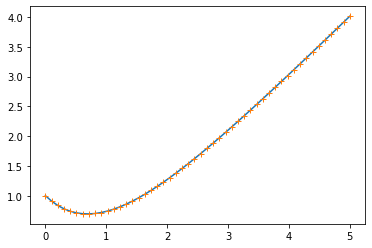

In [3]:
def dy_dt(y,t):
  return t-y

h,tmax = .1,5.
ts = np.linspace(0,tmax,int(tmax/h)) # integrating btw 0,5 ... this makes the discretization of time
y0 = 1.0 # initial condition
ys = odeint(dy_dt, y0, ts) # args: (func in standard form, init cond, time)
ys = np.array(ys).flatten() # this is the numerical solution, flattened because output from ys is not one-dimensional

y_exact = ts - 1 + 2*np.exp(-ts) # exact soln
plt.plot(ts, ys, ts, y_exact, '+')

In [ ]:
# look on slack for solve_ivp code

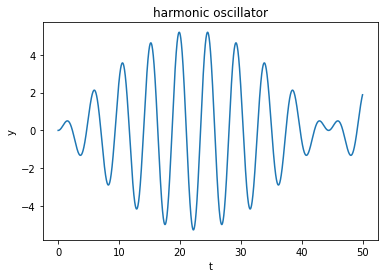

In [8]:
# 2nd order ode solution - spring/mass

def dU_dt(U,t):
  #func should return [dy/dt, dz/dt]
  y,z=U[0],U[1]
  F = np.empty(2)
  # assumptions
  m,k =1.,2.
  # resonant freq
  omega_0=np.sqrt(k/m)

  #this is the freq of forcing term on rhs, if close to omega_0 the system will destabilize
  omega=omega_0 - .1*omega_0

  F[0] = z
  F[1] = -(k/m)*y + (1/m)*np.cos(omega*t)
  return F

U0 = [0,0]
h,tmax = .01,50
ts = np.linspace(0,tmax,int(tmax/h))
Us = odeint(dU_dt, U0, ts)  # u0  has to have same dimensions as du_dt (2)
# first column is soln for y
# second column for z = dy/dt. this is according to U above

ys = Us[:,0]
plt.xlabel('t')
plt.ylabel('y')
plt.title('harmonic oscillator')
plt.plot(ts,ys)